- 仿真代价函数：$f_i(x_i,\sigma(x))=2\|x_i-r_i\|^2+\|x_i - \sigma(x)\|^2$

$\sigma(x) = \frac{\sum x_i}{N} = \frac{\sum \phi(x_i)}{N}$

$\phi(x_i) = x_i$, $\nabla \phi = 1$

$\nabla_1 f = 200(x - r) + 2(x - \sigma)$

$\nabla_2 f = -2(x - \sigma)$

经过300轮迭代, 最终F(x)收敛到:  45.33333333489748
(x, y)走势图(x为起点, .为终点)


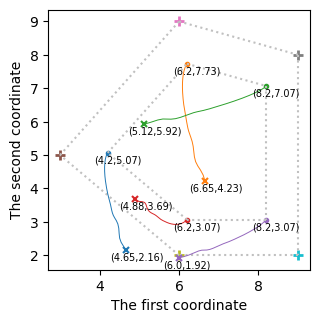

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 300
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 1/2, 1/2],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 0],
    [0, 0, 1/3, 0, 1/2]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = x.copy()

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
r1 = np.array([3.0, 6.0, 9.0, 6.0, 9.0]) # x坐标
r2 = np.array([5.0, 9.0, 8.0, 2.0, 2.0]) # y坐标
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (-2 * (xx[i] - ss[i])) - (-2 * (x[i] - s[i]))

def upd_x(i):
    xx[i] = x[i] - alpha * (4 * (x[i] - r[i]) + 2 * (x[i] - z[i]) + p[i])

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, r1, r2, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    # x = np.random.randint(2, 8, n)
    # x = np.float64(x)
    if op == 1:
        r = r1
        x[0] = 4.82
        x[1] = 6.82
        x[2] = 5.06
        x[3] = 4.94
        x[4] = 6.0
    else:
        r = r2
        x[0] = 2.08
        x[1] = 4.12
        x[2] = 5.96
        x[3] = 3.84
        x[4] = 1.96
    v = np.ones(n)
    s = x.copy()
    # for i in range(n):
    #     s[i] = s[i] * s[i]
    y = -2 * (x - s)
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x, ans_y
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(zz[i])
        backup()
    init(2)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_y[i].append(xx[i])
            s_y[i].append(zz[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x, sum_y = 0, 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
        sum_y += ans_y[i][iter_num-1]
    sum_x /= n
    sum_y /= n
    for i in range(n):
        sum += 2 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               ((ans_x[i][iter_num-1] - sum_x) ** 2 + (ans_y[i][iter_num-1] - sum_y) ** 2)
    return sum

tmp = Iter_Num
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))

col_lt1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
col_lt2 = ['tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

print('(x, y)走势图(x为起点, .为终点)')
plt.xlabel('The first coordinate')
plt.ylabel('The second coordinate')
for i in range(n):
    # plt.text(r1[i]-0.4, r2[i], 'r'+str(i+1), fontsize=7)
    plt.plot(r1[i], r2[i], marker='+', color=col_lt2[i], markersize='7', markeredgewidth=2)
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color='silver', linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color='silver', linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color='silver', linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color='silver', linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color='silver', linestyle='dotted')
for i in range(n):  
    plt.text(ans_x[i][0]-0.4, ans_y[i][0]-0.3, '('+str(round(ans_x[i][0], 2))+','+str(round(ans_y[i][0], 2))+')', fontsize=7)
    # plt.text(ans_x[i][0]-0.3, ans_y[i][0]-0.6, 'agent '+str(i+1), fontsize=7)
    plt.plot(ans_x[i][0], ans_y[i][0], marker='x', color=col_lt1[i], markersize='5', markeredgewidth=1.5) # 黑色x为起点
    plt.plot(ans_x[i], ans_y[i], linewidth=0.7, color=col_lt1[i], linestyle='-')
    plt.text(ans_x[i][Iter_Num - 1]-0.35, ans_y[i][Iter_Num - 1]-0.3, '('+str(round(ans_x[i][Iter_Num - 1], 2))+','+str(round(ans_y[i][Iter_Num - 1], 2))+')', fontsize=7)
    plt.plot(ans_x[i][Iter_Num - 1], ans_y[i][Iter_Num - 1], marker = '.', color=col_lt1[i]) # 黑色.为终点
plt.plot([ans_x[0][Iter_Num - 1], ans_x[1][Iter_Num - 1]], [ans_y[0][Iter_Num - 1], ans_y[1][Iter_Num - 1]], color='silver', linestyle='dotted')
plt.plot([ans_x[1][Iter_Num - 1], ans_x[2][Iter_Num - 1]], [ans_y[1][Iter_Num - 1], ans_y[2][Iter_Num - 1]], color='silver', linestyle='dotted')
plt.plot([ans_x[2][Iter_Num - 1], ans_x[4][Iter_Num - 1]], [ans_y[2][Iter_Num - 1], ans_y[4][Iter_Num - 1]], color='silver', linestyle='dotted')
plt.plot([ans_x[4][Iter_Num - 1], ans_x[3][Iter_Num - 1]], [ans_y[4][Iter_Num - 1], ans_y[3][Iter_Num - 1]], color='silver', linestyle='dotted')
plt.plot([ans_x[3][Iter_Num - 1], ans_x[0][Iter_Num - 1]], [ans_y[3][Iter_Num - 1], ans_y[0][Iter_Num - 1]], color='silver', linestyle='dotted')

plt.rcParams['figure.figsize']=(8.58 / 2.54, 8.58 / 2.54)
plt.savefig('fig4.eps')

x/y坐标的走势图


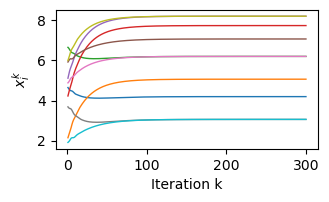

In [17]:
print('x/y坐标的走势图')
plt.xlabel('Iteration k')
plt.ylabel('$x_i^k$')
for i in range(n):
    plt.plot(range(1, Iter_Num+1), ans_x[i], linestyle='-', linewidth=1)
    plt.plot(range(1, Iter_Num+1), ans_y[i], linestyle='-', linewidth=1)
plt.rcParams['figure.figsize']=(8.58 / 2.54, 4.58 / 2.54)
plt.savefig('fig5.eps')

6.599992695292301
5.199989453149651
x/y坐标z的走势图


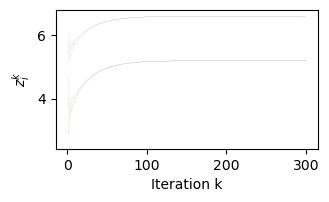

In [8]:
print(s_x[0][Iter_Num-1])
print(s_y[0][Iter_Num-1])
print('x/y坐标z的走势图')
plt.xlabel('Iteration k')
plt.ylabel('$z_i^k$')
for i in range(n):
    plt.plot(range(1, Iter_Num + 1), s_x[i], linestyle='dashed', linewidth=0.05)
    plt.plot(range(1, Iter_Num + 1), s_y[i], linestyle='dashed', linewidth=0.05)
plt.rcParams['figure.figsize']=(8.58 / 2.54, 8.58 / 2.54)
plt.savefig('fig6.eps')

In [9]:
# # 检验z的收敛性
# sum = 0
# for i in range(n):
#     sum += (ans_y[i][tmp-1])
# print(sum / n)
# for i in range(n):
#     print(z[i])

# # 检验p的收敛性
# sum = 0
# for i in range(n):
#     sum += ans_y[i][tmp-1]
# sum /= n
# print(2 * (sum - 5))
# for i in range(n):
#     print(p[i])